## Assignment for Week 4 - Decision Trees and Random Forest

### Exercise:
German credit dataset: located in the assign_wk4 folder

**Objective:** to minimize loss from the bank’s perspective.

Bank (by loan manager) needs to decide who will get loan approval based on the applicants’ demographic and socio-economic profiles. The data set consists of 20 variables and classification on applicant whether he/she has good or bad credit risk. The predictive model will provide guidance in making loan approval decision on prospective applicants based on clients’ profiles.

From the given data set, perform the task using decision tree. 
* What are your findings?
* Plot and interpret the tree.
* Check for over-fitting and optimize parameters and features to obtain the best model.
* Conclude your finding.

From the given data set, perform the task using random forest. 
* Check for over-fitting and optimize parameters and features to obtain the best model.
* **Bonus:** Use GridSearch to optimize parameters.
* Summarize your finding.

Compare results of decision tree and random forest.



### Deliverables:

Upload your notebook's .ipynb file.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

## Assignment Objective
To minimize loss from the bank's perspective by predicting good/bad credit risk using Decision Trees and Random Forests on the German credit dataset.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the German credit risk dataset
df = pd.read_csv('german_credit_risk.csv')

# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
print("Cost.Matrix values:", df['Cost.Matrix'].value_counts())
print("\nNote: 1 = Good Credit Risk, 2 = Bad Credit Risk")


Dataset Shape: (1000, 21)

Column Names:
 1. Checking.Account
 2. Duration
 3. Credit.Hist
 4. Purpose
 5. Credit.Amount
 6. Saving.Account
 7. Employmnet
 8. Disposable.Income
 9. Personal.Status
10. Other.Debtors
11. Present.Residence
12. Property
13. Age
14. Other.Loans
15. Housing
16. Existing.Credits
17. Job
18. Number.Liable
19. Telephone
20. Foreign.Worker
21. Cost.Matrix

First 5 rows:
  Checking.Account  Duration Credit.Hist Purpose  Credit.Amount  \
0              A11         6         A34     A43           1169   
1              A12        48         A32     A43           5951   
2              A14        12         A34     A46           2096   
3              A11        42         A32     A42           7882   
4              A11        24         A33     A40           4870   

  Saving.Account Employmnet  Disposable.Income Personal.Status Other.Debtors  \
0            A65        A75                  4             A93          A101   
1            A61        A73             

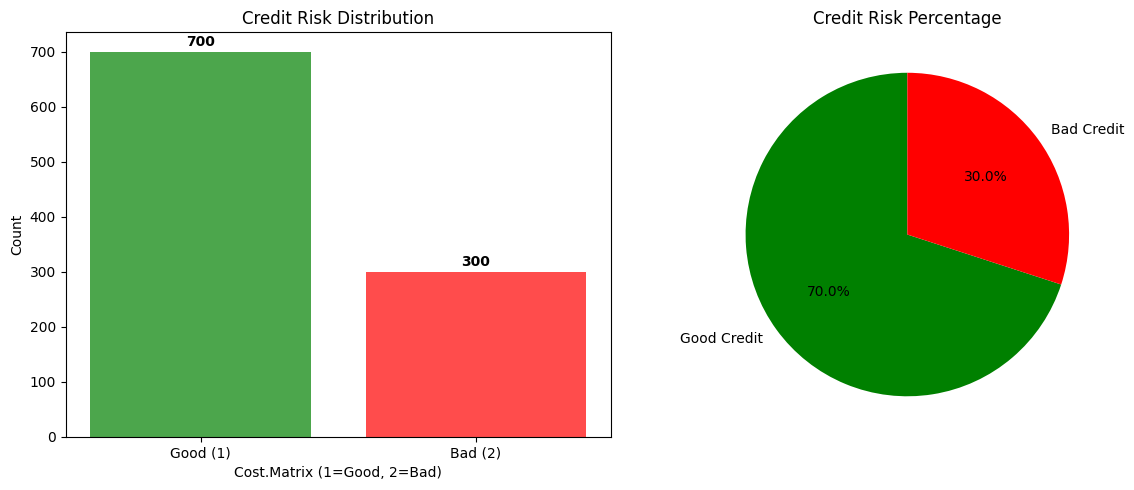

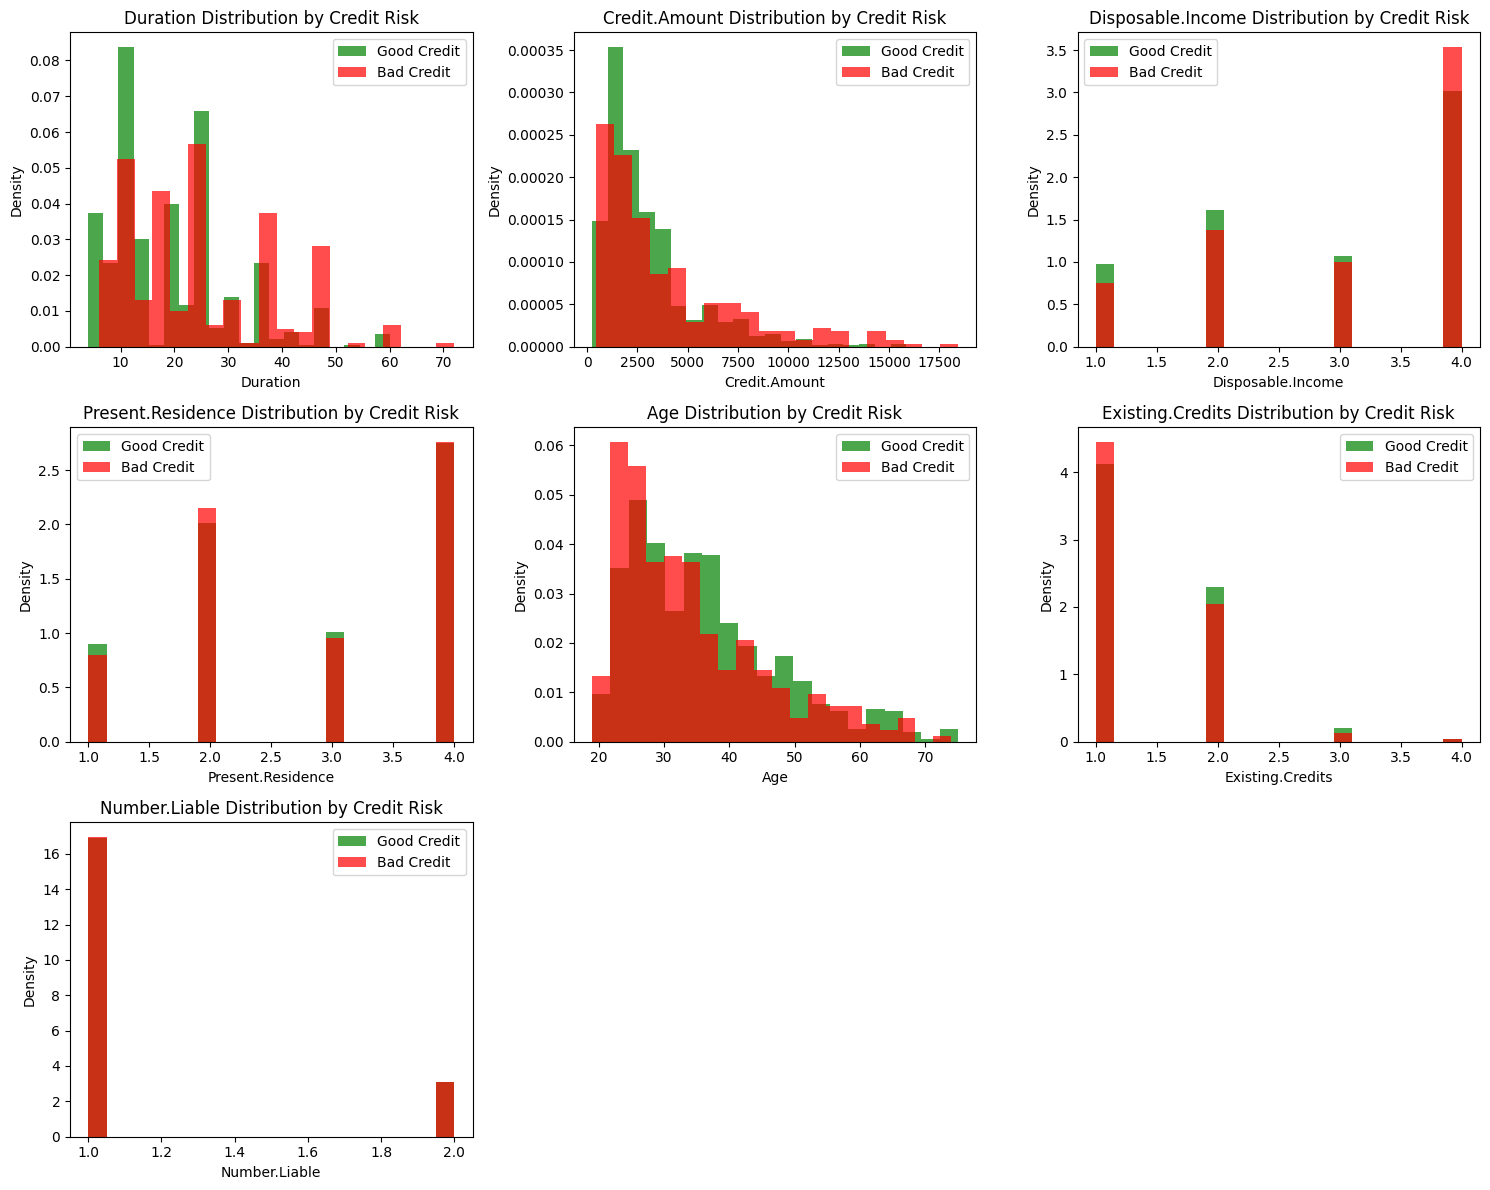

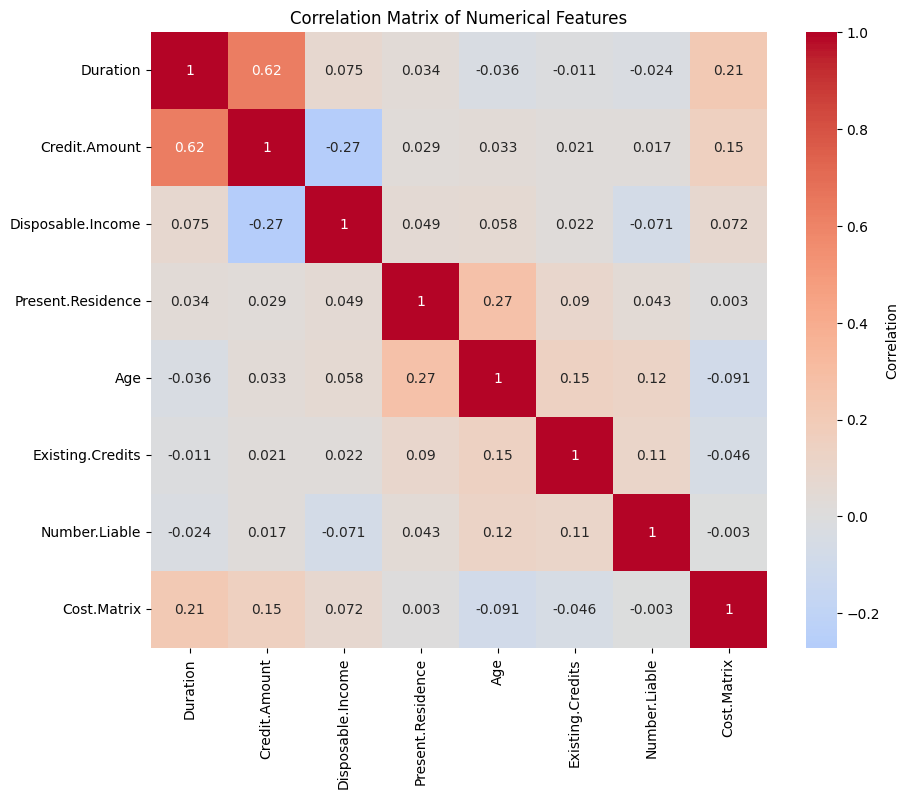

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
target_counts = df['Cost.Matrix'].value_counts()
bars = plt.bar([1, 2], target_counts.values, color=['green', 'red'], alpha=0.7)
plt.title('Credit Risk Distribution')
plt.xlabel('Cost.Matrix (1=Good, 2=Bad)')
plt.ylabel('Count')
plt.xticks([1, 2], ['Good (1)', 'Bad (2)'])

# Add count labels on bars
for bar, count in zip(bars, target_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(count), ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['Good Credit', 'Bad Credit'], 
        autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Credit Risk Percentage')

plt.tight_layout()
plt.show()

# Numerical features analysis
numerical_features = ['Duration', 'Credit.Amount', 'Disposable.Income', 
                      'Present.Residence', 'Age', 'Existing.Credits', 'Number.Liable']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)

    # Create histograms for each class
    good_credit = df[df['Cost.Matrix'] == 1][feature]
    bad_credit = df[df['Cost.Matrix'] == 2][feature]

    plt.hist(good_credit, alpha=0.7, label='Good Credit', color='green', bins=20, density=True)
    plt.hist(bad_credit, alpha=0.7, label='Bad Credit', color='red', bins=20, density=True)

    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'{feature} Distribution by Credit Risk')

plt.tight_layout()
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
numerical_data = df[numerical_features + ['Cost.Matrix']]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [10]:
## 3. Data Preprocessing

numerical_cols = ['Duration', 'Credit.Amount', 'Disposable.Income', 
                  'Present.Residence', 'Age', 'Existing.Credits', 'Number.Liable']
categorical_cols = ['Checking.Account', 'Credit.Hist', 'Purpose', 'Saving.Account', 
                   'Employmnet', 'Personal.Status', 'Other.Debtors', 'Property', 
                   'Other.Loans', 'Housing', 'Job', 'Telephone', 'Foreign.Worker']

print("Categorical columns:", len(categorical_cols))
print("Numerical columns:", len(numerical_cols))
print("Target column: Cost.Matrix")


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataset shape after encoding:", df_encoded.shape)
print("Total features after encoding:", df_encoded.shape[1] - 1)  


df_encoded['Target'] = df_encoded['Cost.Matrix'].map({1: 0, 2: 1})  # 0=Good, 1=Bad


X = df_encoded.drop(['Cost.Matrix', 'Target'], axis=1)
y = df_encoded['Target']  # 0=Good Credit, 1=Bad Credit

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution after conversion:")
print("0 (Good Credit):", (y == 0).sum())
print("1 (Bad Credit):", (y == 1).sum())


Categorical columns: 13
Numerical columns: 7
Target column: Cost.Matrix

Dataset shape after encoding: (1000, 49)
Total features after encoding: 48

Features shape: (1000, 48)
Target shape: (1000,)

Target distribution after conversion:
0 (Good Credit): 700
1 (Bad Credit): 300


In [15]:
## 4. Train-Test Split

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining target distribution:")
print("Good Credit (0):", (y_train == 0).sum())
print("Bad Credit (1):", (y_train == 1).sum())
print("\nTest target distribution:")
print("Good Credit (0):", (y_test == 0).sum())
print("Bad Credit (1):", (y_test == 1).sum())

Training set shape: (800, 48)
Test set shape: (200, 48)

Training target distribution:
Good Credit (0): 560
Bad Credit (1): 240

Test target distribution:
Good Credit (0): 140
Bad Credit (1): 60


=== INITIAL DECISION TREE RESULTS ===

Classification Report:
              precision    recall  f1-score   support

 Good Credit       0.72      0.94      0.81       140
  Bad Credit       0.47      0.13      0.21        60

    accuracy                           0.69       200
   macro avg       0.59      0.53      0.51       200
weighted avg       0.64      0.69      0.63       200



<Figure size 800x600 with 0 Axes>

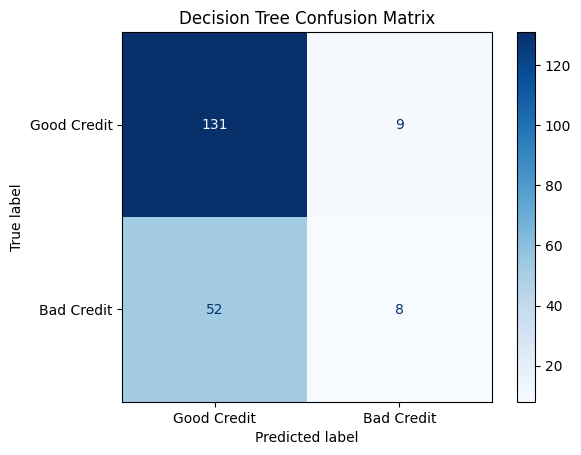


Cost Matrix Loss: 269
(Lower is better - bank's perspective)
Breakdown:
- False Positives (Good→Bad): 9 × 1 = 9
- False Negatives (Bad→Good): 52 × 5 = 260


In [ ]:
## 5. Decision Tree Implementation

dt_initial = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_initial.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_initial.predict(X_test)

# Evaluation
print("=== INITIAL DECISION TREE RESULTS ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Good Credit', 'Bad Credit']))


cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(dt_initial, X_test, y_test, 
                                     display_labels=['Good Credit', 'Bad Credit'], 
                                     cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


cost_dt = (cm_dt[1, 0] * 5) + (cm_dt[0, 1] * 1)  
print(f"\nCost Matrix Loss: {cost_dt}")
print("(Lower is better - bank's perspective)")
print("Breakdown:")
print(f"- False Positives (Good→Bad): {cm_dt[0, 1]} × 1 = {cm_dt[0, 1]}")
print(f"- False Negatives (Bad→Good): {cm_dt[1, 0]} × 5 = {cm_dt[1, 0] * 5}")

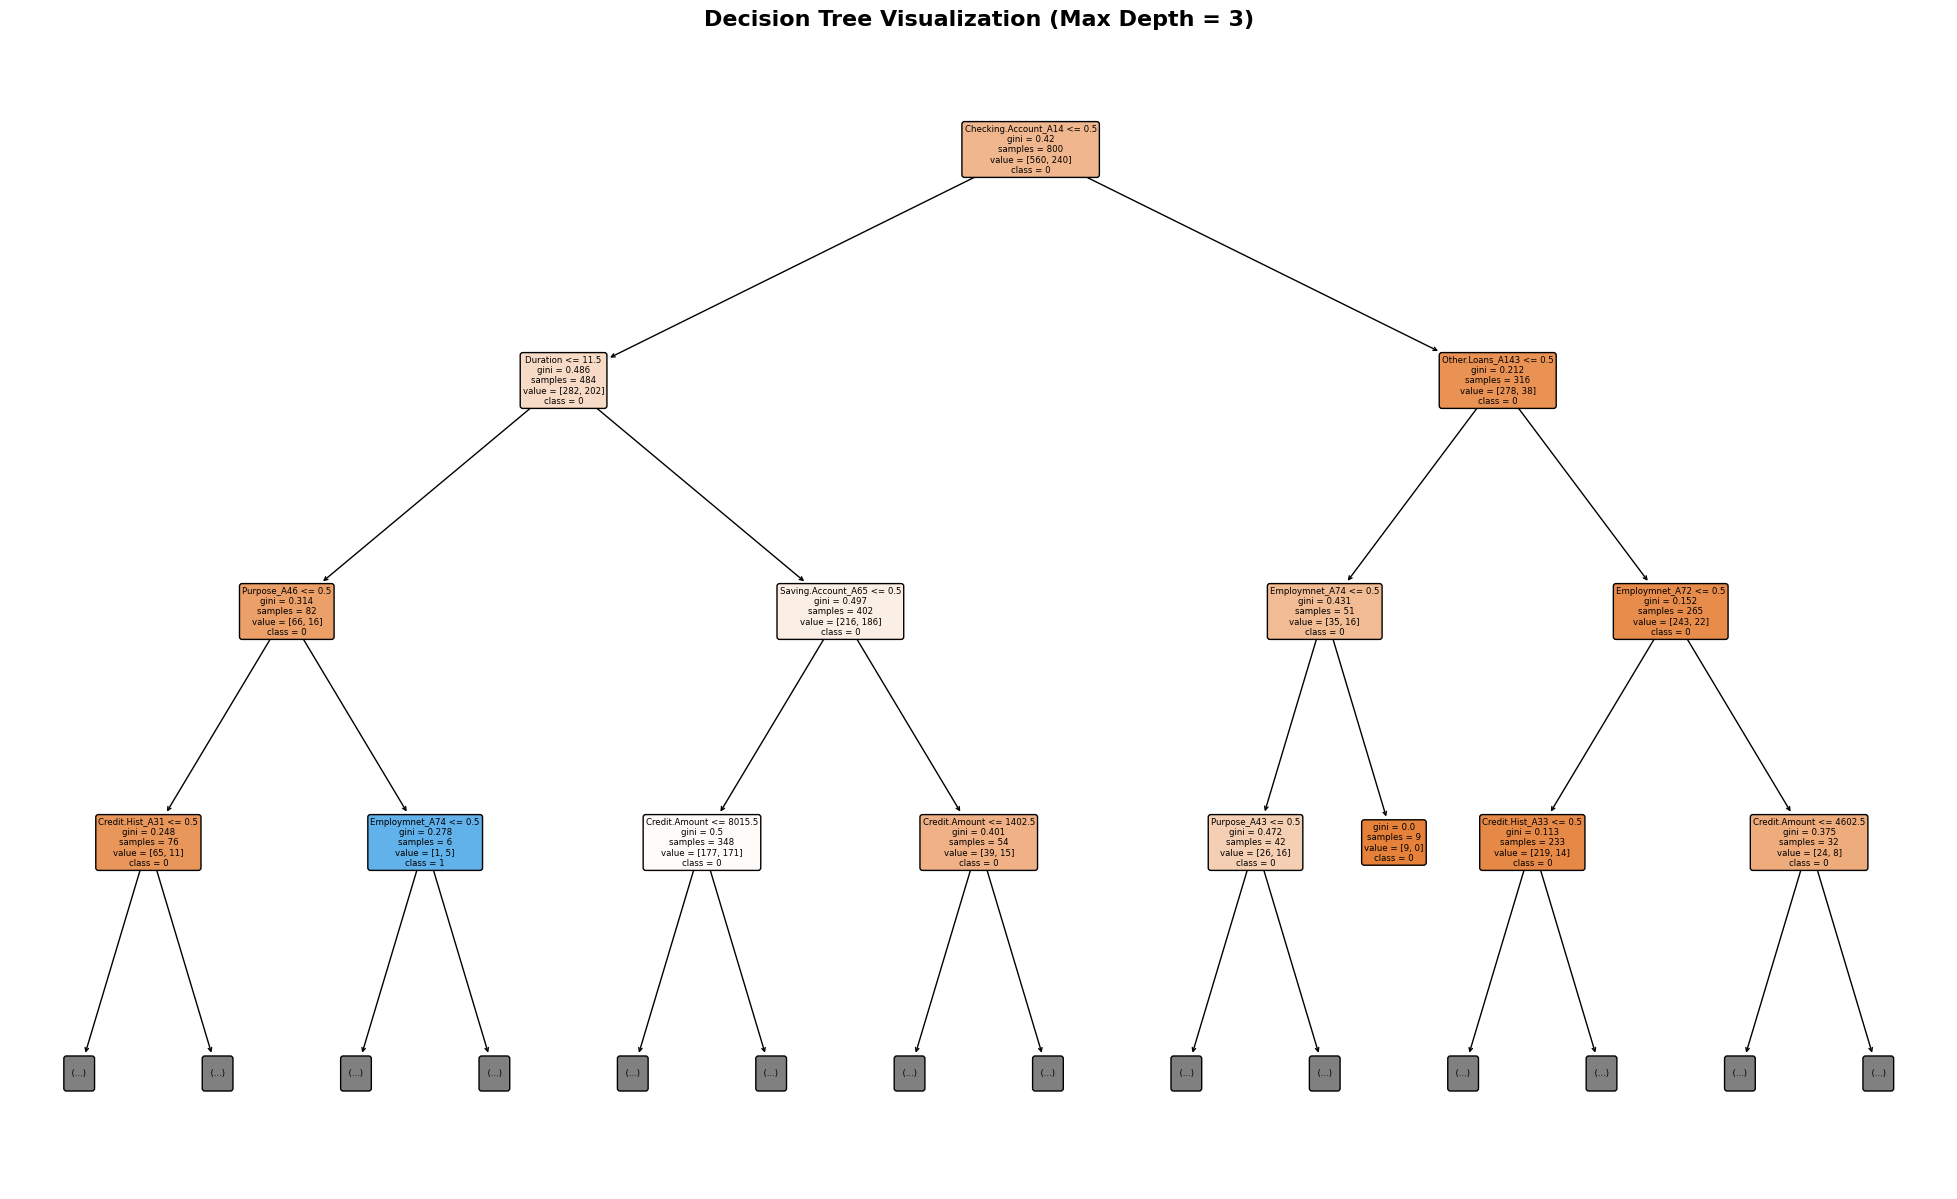

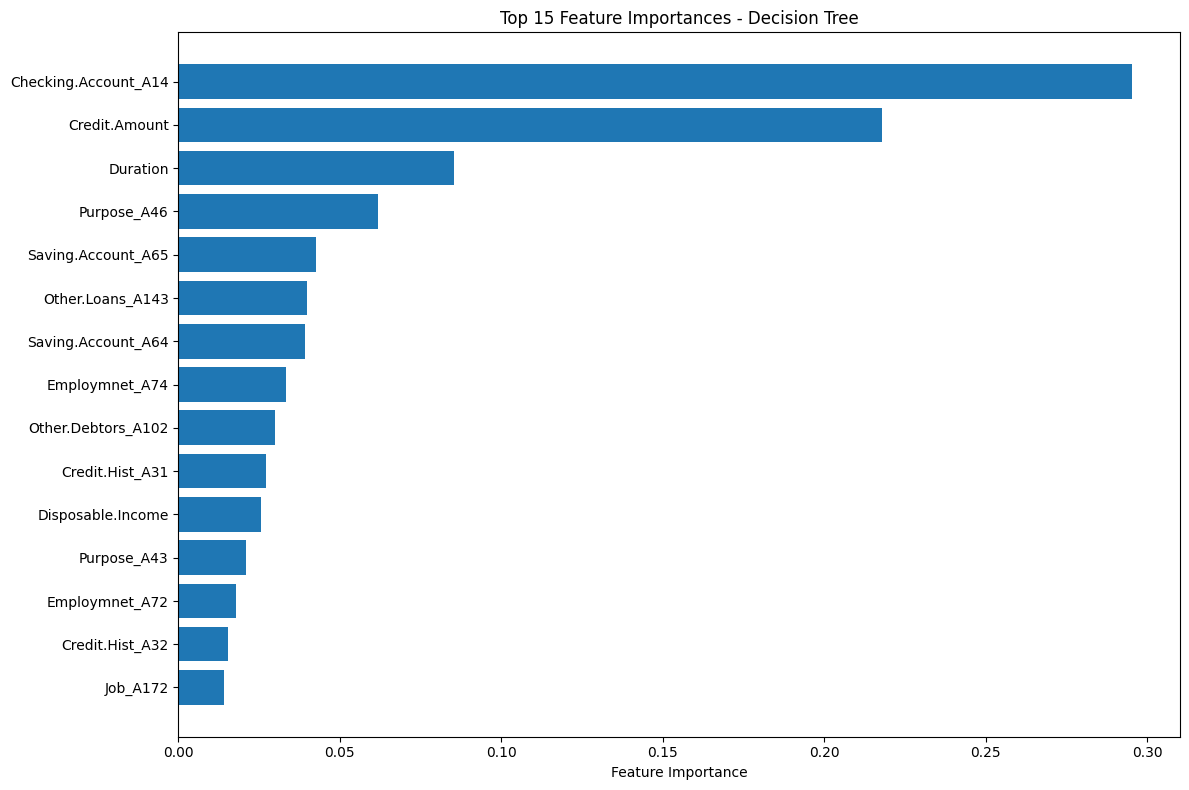

Top 10 Most Important Features:
                 feature  importance
9   Checking.Account_A14    0.295391
1          Credit.Amount    0.217819
0               Duration    0.085348
20           Purpose_A46    0.061715
26    Saving.Account_A65    0.042543
40      Other.Loans_A143    0.039847
25    Saving.Account_A64    0.039193
29        Employmnet_A74    0.033415
34    Other.Debtors_A102    0.029874
10       Credit.Hist_A31    0.027075


In [ ]:
## 6. Decision Tree Visualization

plt.figure(figsize=(25, 15))
plot_tree(
    dt_initial,
    feature_names=list(X.columns),  
    class_names=[str(c) for c in dt_initial.classes_],  
    filled=True,
    max_depth=3,
    rounded=True
)
plt.title('Decision Tree Visualization (Max Depth = 3)', fontsize=16, fontweight='bold')
plt.show()


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_initial.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


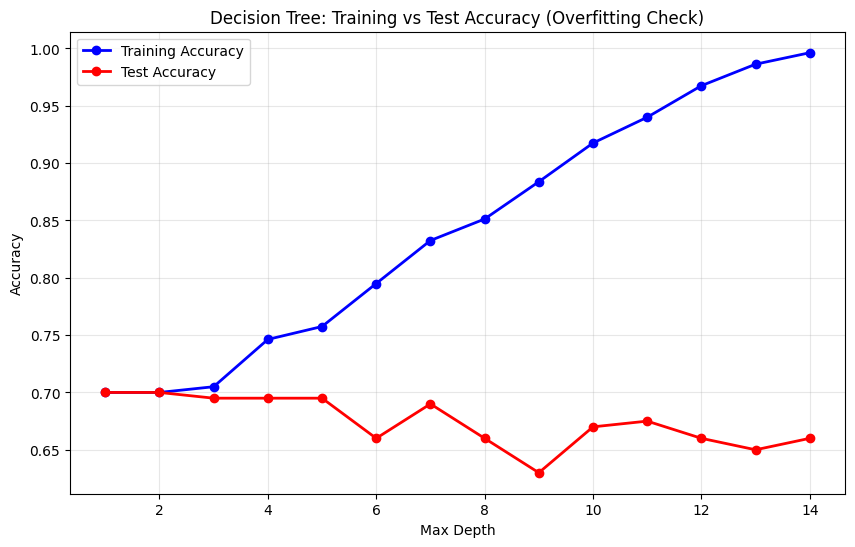

Optimal max_depth based on test accuracy: 1

Running GridSearchCV for Decision Tree optimization...

=== OPTIMIZED DECISION TREE ===
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score: 0.7125

Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

 Good Credit       0.80      0.76      0.78       140
  Bad Credit       0.50      0.57      0.53        60

    accuracy                           0.70       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.71      0.70      0.70       200


Optimized Decision Tree Cost: 164


<Figure size 800x600 with 0 Axes>

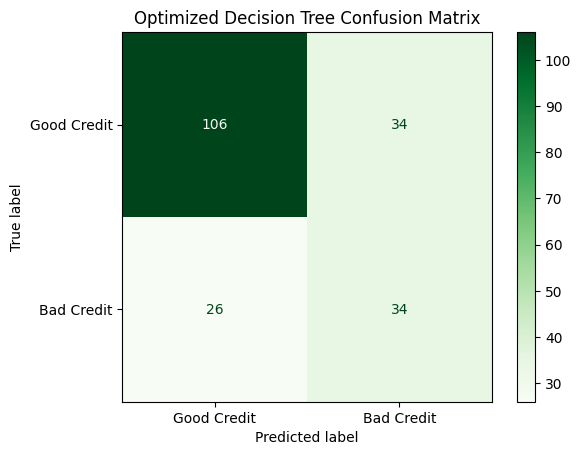

In [18]:
## 7. Decision Tree Overfitting Check and Optimization


# Check overfitting by testing different max_depths
depths = range(1, 15)
train_scores = []
test_scores = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt_temp.fit(X_train, y_train)

    train_score = dt_temp.score(X_train, y_train)
    test_score = dt_temp.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot overfitting analysis
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Accuracy', color='blue', linewidth=2)
plt.plot(depths, test_scores, 'o-', label='Test Accuracy', color='red', linewidth=2)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Test Accuracy (Overfitting Check)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal depth
optimal_depth = depths[np.argmax(test_scores)]
print(f"Optimal max_depth based on test accuracy: {optimal_depth}")

# Grid search for best parameters
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("\nRunning GridSearchCV for Decision Tree optimization...")
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, 
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("\n=== OPTIMIZED DECISION TREE ===")
print("Best parameters:", grid_dt.best_params_)
print("Best cross-validation score:", grid_dt.best_score_)

# Evaluate best model
best_dt = grid_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

print("\nOptimized Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dt, target_names=['Good Credit', 'Bad Credit']))

# Cost analysis for optimized model
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
cost_best_dt = (cm_best_dt[1, 0] * 5) + (cm_best_dt[0, 1] * 1)
print(f"\nOptimized Decision Tree Cost: {cost_best_dt}")

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test, 
                                     display_labels=['Good Credit', 'Bad Credit'], 
                                     cmap='Greens')
plt.title('Optimized Decision Tree Confusion Matrix')
plt.show()

=== INITIAL RANDOM FOREST RESULTS ===

Classification Report:
              precision    recall  f1-score   support

 Good Credit       0.75      0.96      0.84       140
  Bad Credit       0.74      0.23      0.35        60

    accuracy                           0.74       200
   macro avg       0.74      0.60      0.60       200
weighted avg       0.74      0.74      0.70       200



<Figure size 800x600 with 0 Axes>

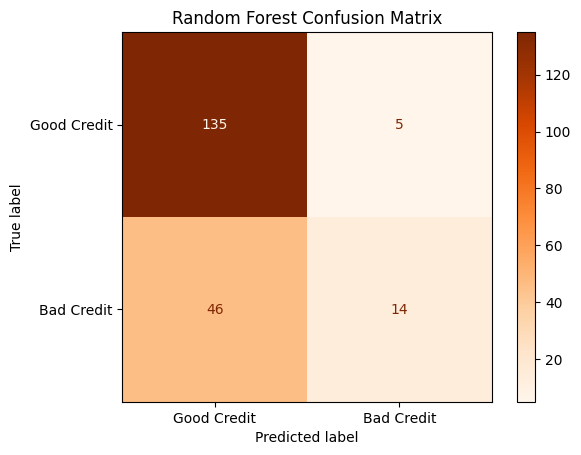


Random Forest Cost Matrix Loss: 235


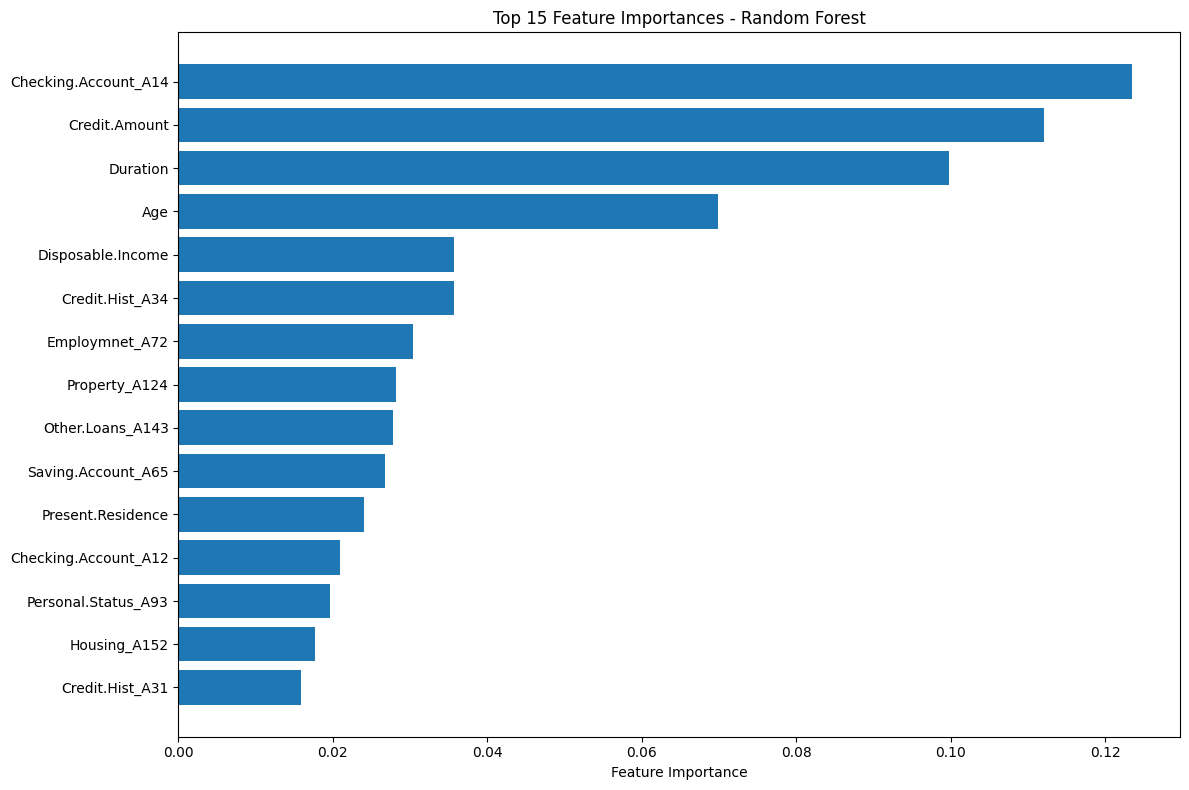


Top 10 Most Important Features (Random Forest):
                 feature  importance
9   Checking.Account_A14    0.123521
1          Credit.Amount    0.112046
0               Duration    0.099788
4                    Age    0.069888
2      Disposable.Income    0.035690
13       Credit.Hist_A34    0.035683
27        Employmnet_A72    0.030389
38         Property_A124    0.028169
40      Other.Loans_A143    0.027824
26    Saving.Account_A65    0.026798


In [22]:
## 8. Random Forest Implementation


# Initial Random Forest model
rf_initial = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7)
rf_initial.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_initial.predict(X_test)

# Evaluation
print("=== INITIAL RANDOM FOREST RESULTS ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Good Credit', 'Bad Credit']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf_initial, X_test, y_test, 
                                     display_labels=['Good Credit', 'Bad Credit'], 
                                     cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Cost Matrix Analysis
cost_rf = (cm_rf[1, 0] * 5) + (cm_rf[0, 1] * 1)
print(f"\nRandom Forest Cost Matrix Loss: {cost_rf}")

# Feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_initial.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_rf_features = rf_importance.head(15)
plt.barh(range(len(top_rf_features)), top_rf_features['importance'])
plt.yticks(range(len(top_rf_features)), top_rf_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features (Random Forest):")
print(rf_importance.head(10))

Running GridSearchCV for Random Forest optimization...
=== OPTIMIZED RANDOM FOREST ===
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.7462476415758497

Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

 Good Credit       0.77      0.97      0.86       140
  Bad Credit       0.83      0.32      0.46        60

    accuracy                           0.78       200
   macro avg       0.80      0.64      0.66       200
weighted avg       0.79      0.78      0.74       200


Optimized Random Forest Cost: 209


<Figure size 800x600 with 0 Axes>

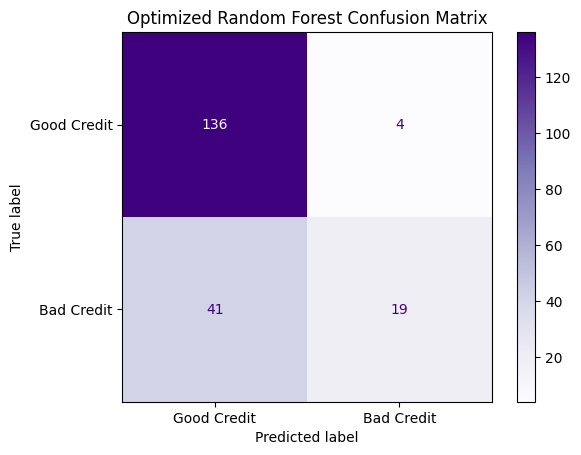

In [24]:
## 9. Random Forest Optimization


# Grid search for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Running GridSearchCV for Random Forest optimization...")
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, 
                       cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("=== OPTIMIZED RANDOM FOREST ===")
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation score:", grid_rf.best_score_)

# Evaluate best Random Forest
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nOptimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf, target_names=['Good Credit', 'Bad Credit']))

# Cost analysis for optimized Random Forest
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
cost_best_rf = (cm_best_rf[1, 0] * 5) + (cm_best_rf[0, 1] * 1)
print(f"\nOptimized Random Forest Cost: {cost_best_rf}")

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, 
                                     display_labels=['Good Credit', 'Bad Credit'], 
                                     cmap='Purples')
plt.title('Optimized Random Forest Confusion Matrix')
plt.show()



=== MODEL COMPARISON ===
                     Model  Test Accuracy  Cost Matrix Loss
0    Initial Decision Tree          0.695               269
1  Optimized Decision Tree          0.700               164
2    Initial Random Forest          0.745               235
3  Optimized Random Forest          0.775               209


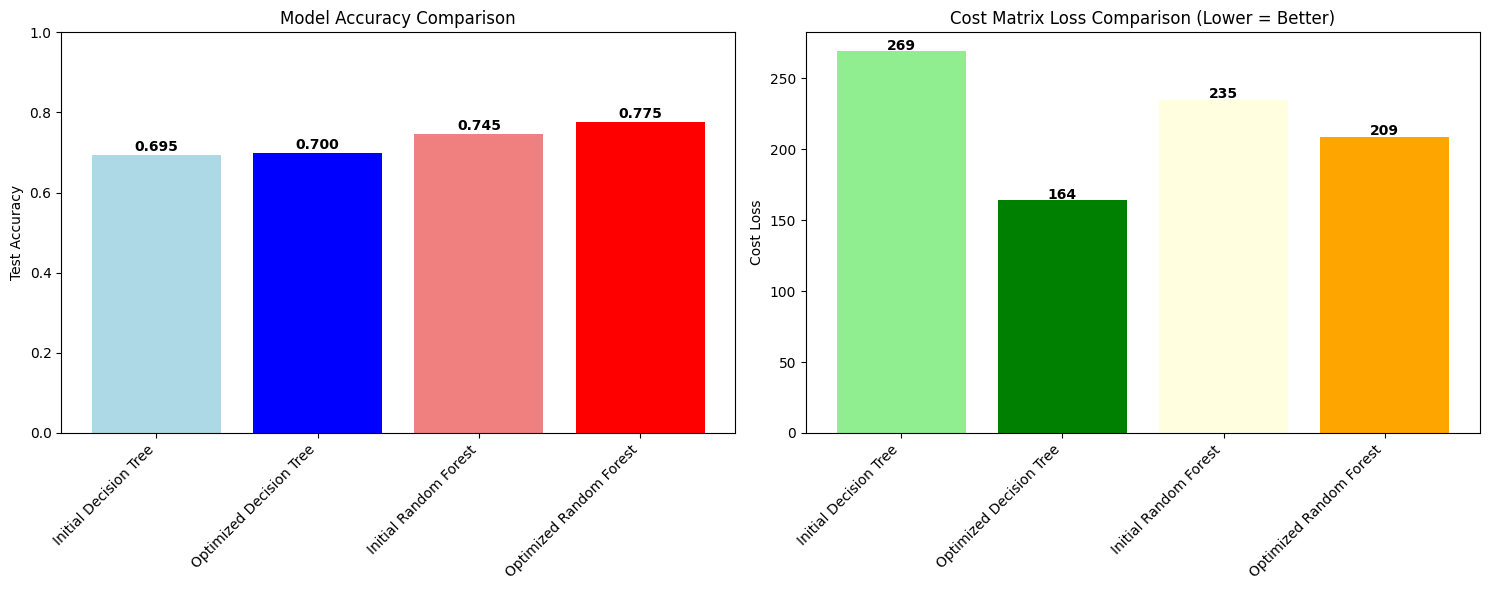


=== FINAL RECOMMENDATION ===
Best Model: Optimized Decision Tree
Lowest Cost Loss: 164
Test Accuracy: 0.700

This model minimizes the bank's financial risk by reducing costly false negatives
(approving loans to bad credit customers).


In [25]:
## 10. Model Comparison and Final Analysis
models_comparison = {
    'Model': ['Initial Decision Tree', 'Optimized Decision Tree', 'Initial Random Forest', 'Optimized Random Forest'],
    'Test Accuracy': [
        dt_initial.score(X_test, y_test),
        best_dt.score(X_test, y_test), 
        rf_initial.score(X_test, y_test),
        best_rf.score(X_test, y_test)
    ],
    'Cost Matrix Loss': [cost_dt, cost_best_dt, cost_rf, cost_best_rf]
}

comparison_df = pd.DataFrame(models_comparison)
print("=== MODEL COMPARISON ===")
print(comparison_df)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


bars1 = ax1.bar(range(len(comparison_df)), comparison_df['Test Accuracy'], 
                color=['lightblue', 'blue', 'lightcoral', 'red'])
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Test Accuracy')
ax1.set_xticks(range(len(comparison_df)))
ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax1.set_ylim(0, 1)


for bar, acc in zip(bars1, comparison_df['Test Accuracy']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', fontweight='bold')


bars2 = ax2.bar(range(len(comparison_df)), comparison_df['Cost Matrix Loss'], 
                color=['lightgreen', 'green', 'lightyellow', 'orange'])
ax2.set_title('Cost Matrix Loss Comparison (Lower = Better)')
ax2.set_ylabel('Cost Loss')
ax2.set_xticks(range(len(comparison_df)))
ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')


for bar, cost in zip(bars2, comparison_df['Cost Matrix Loss']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{int(cost)}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


best_model_idx = comparison_df['Cost Matrix Loss'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_cost = comparison_df.loc[best_model_idx, 'Cost Matrix Loss']
best_model_accuracy = comparison_df.loc[best_model_idx, 'Test Accuracy']

print(f"\n=== FINAL RECOMMENDATION ===")
print(f"Best Model: {best_model_name}")
print(f"Lowest Cost Loss: {int(best_model_cost)}")
print(f"Test Accuracy: {best_model_accuracy:.3f}")
print("\nThis model minimizes the bank's financial risk by reducing costly false negatives")
print("(approving loans to bad credit customers).")